In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_data = pd.read_csv(train_url)

In [8]:
#Fill NaN in Age with 19 if they don't have any family members
# Assuming that they would be young adult people traveling alone
#Fill NaN in Age with 17 if their family members are 2 or more 
for i,age in enumerate(train_data["Age"]):
    num_fam_members = train_data["Parch"][i] + train_data["SibSp"][i]
    if num_fam_members == 0: 
        train_data["Age"] = train_data["Age"].fillna(19)
    elif num_fam_members >= 2:
        train_data["Age"] = train_data["Age"].fillna(17)

#could have used passengerID, which the value is the same as the index

In [9]:
train_data["Child"] = float("NaN")
train_data.loc[train_data.Age < 18, "Child"] = 1
train_data.loc[train_data.Age >= 18, "Child"] = 0

In [10]:
# make a new dataFrame based on survival
survived_data = train_data[train_data.Survived == 1]

In [12]:
# make a second dataFrame that encompasses those not survived
not_survived_Data = train_data[train_data.Survived == 0]

In [22]:
survived_age = np.asarray(survived_data["Age"])
not_survived_age = np.asarray(survived_data["Age"])

[0, 10, 20, 30, 40, 50, 60, 70, 80]
[0, 10, 20, 30, 40, 50, 60, 70]
[0, 10, 20, 30, 40, 50, 60, 70]
[4.269662921348314, 10.44943820224719, 8.651685393258427, 8.202247191011235, 3.8202247191011236, 2.247191011235955, 0.6741573033707865, 0.11235955056179776]


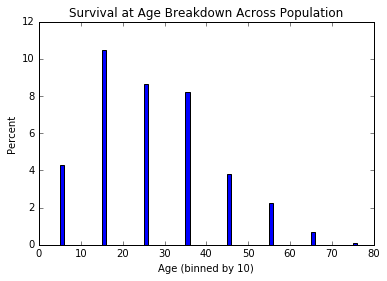

In [20]:
%matplotlib inline
survived_binned, bin_edges = np.histogram(survived_age, bins=[0,10,20,30,40,50,60,70,80])

survived_list = list(survived_binned)
convert_to_float = [float(i) for i in survived_list]

age_percent = [n/890*100 for n in convert_to_float]

bins = list(bin_edges)
print(bins)
bins.pop()
print(bins)
position = [x + 5 for x in bins]
print(bins)

#age_percent = np.divide(x_binned, np.asarray([890]))
print(age_percent)

fig, ax = plt.subplots()

width = 1
chart = ax.bar(position, age_percent, width)
title = "Survival at Age Breakdown Across Population"
y_axis = "Percent"
x_axis = "Age (binned by 10)"
ax.set_title(title)
ax.set_ylabel(y_axis)
ax.set_xlabel(x_axis)
plt.show()

[38 93 77 73 34 20  6  1]
[62, 279, 220, 167, 89, 48, 19, 7]
[61.29032258064516, 33.33333333333333, 35.0, 43.712574850299404, 38.20224719101123, 41.66666666666667, 31.57894736842105, 14.285714285714285]


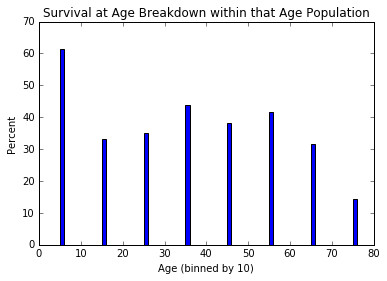

In [32]:
%matplotlib inline
survived_binned, bin_edges = np.histogram(survived_age, bins=[0,10,20,30,40,50,60,70,80])
print(survived_binned)
survived_list = list(survived_binned)
convert_to_float_survived = [float(i) for i in survived_list]

not_survived_binned, bin_edges = np.histogram(not_survived_age, bins=[0,10,20,30,40,50,60,70,80])

not_survived_list = list(survived_binned)
convert_to_float_survived = [float(i) for i in survived_list]

all_ages = np.asarray(train_data["Age"])
all_ages_binned, edges = np.histogram(all_ages, bins=[0,10,20,30,40,50,60,70,80])
all_ages_list = list(all_ages_binned)
convert_to_float_all = [float(i) for i in all_ages_list]
print(all_ages_list)

normalized = []
for s, a in zip(convert_to_float_survived, convert_to_float_all):
    percent = s/a*100
    normalized.append(percent)
    
print(normalized)

fig, ax = plt.subplots()

width = 1
chart = ax.bar(position, normalized, width)
title = "Survival at Age Breakdown within that Age Population"
y_axis = "Percent"
x_axis = "Age (binned by 10)"
ax.set_title(title)
ax.set_ylabel(y_axis)
ax.set_xlabel(x_axis)
plt.show()


[38 93 77 73 34 20  6  1]
[  62.  279.  220.  167.   89.   48.   19.    7.]
[ 38.  93.  77.  73.  34.  20.   6.   1.]
[ 61.29032258  33.33333333  35.          43.71257485  38.20224719
  41.66666667  31.57894737  14.28571429]


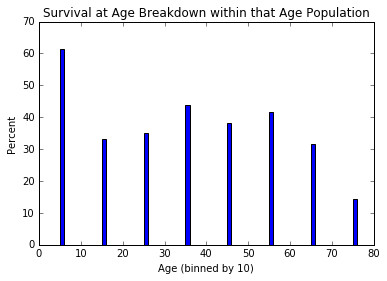

In [37]:
%matplotlib inline
survived_binned, bin_edges = np.histogram(survived_age, bins=[0,10,20,30,40,50,60,70,80])
print(survived_binned)

all_ages = np.asarray(train_data["Age"])
all_ages_binned, edges = np.histogram(all_ages, bins=[0,10,20,30,40,50,60,70,80])

all_ages_float = all_ages_binned.astype(np.float)

survived_ages_float = survived_binned.astype(np.float)

normalized = survived_ages_float/all_ages_float*100

fig, ax = plt.subplots()

width = 1
chart = ax.bar(position, normalized, width)
title = "Survival at Age Breakdown within that Age Population"
y_axis = "Percent"
x_axis = "Age (binned by 10)"
ax.set_title(title)
ax.set_ylabel(y_axis)
ax.set_xlabel(x_axis)
plt.show()